# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [13]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['font.size'] = 12
filterwarnings('ignore')

In [14]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [18]:
boosting = Boosting()
%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: total: 703 ms
Wall time: 1.87 s
Train ROC-AUC 0.9894
Valid ROC-AUC 0.9138
Test ROC-AUC 0.9113


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [19]:
results = {}

depths = range(1, 30, 2)

train_scores = []
test_scores = []

for depth in depths:
    boosting = Boosting(base_model_params = {"max_depth": depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_scores.append(boosting.score(x_train, y_train))
    test_scores.append(boosting.score(x_test, y_test))

Text(0.5, 1.0, 'Зависимость AUC-ROC от максимальной глубины в GBM')

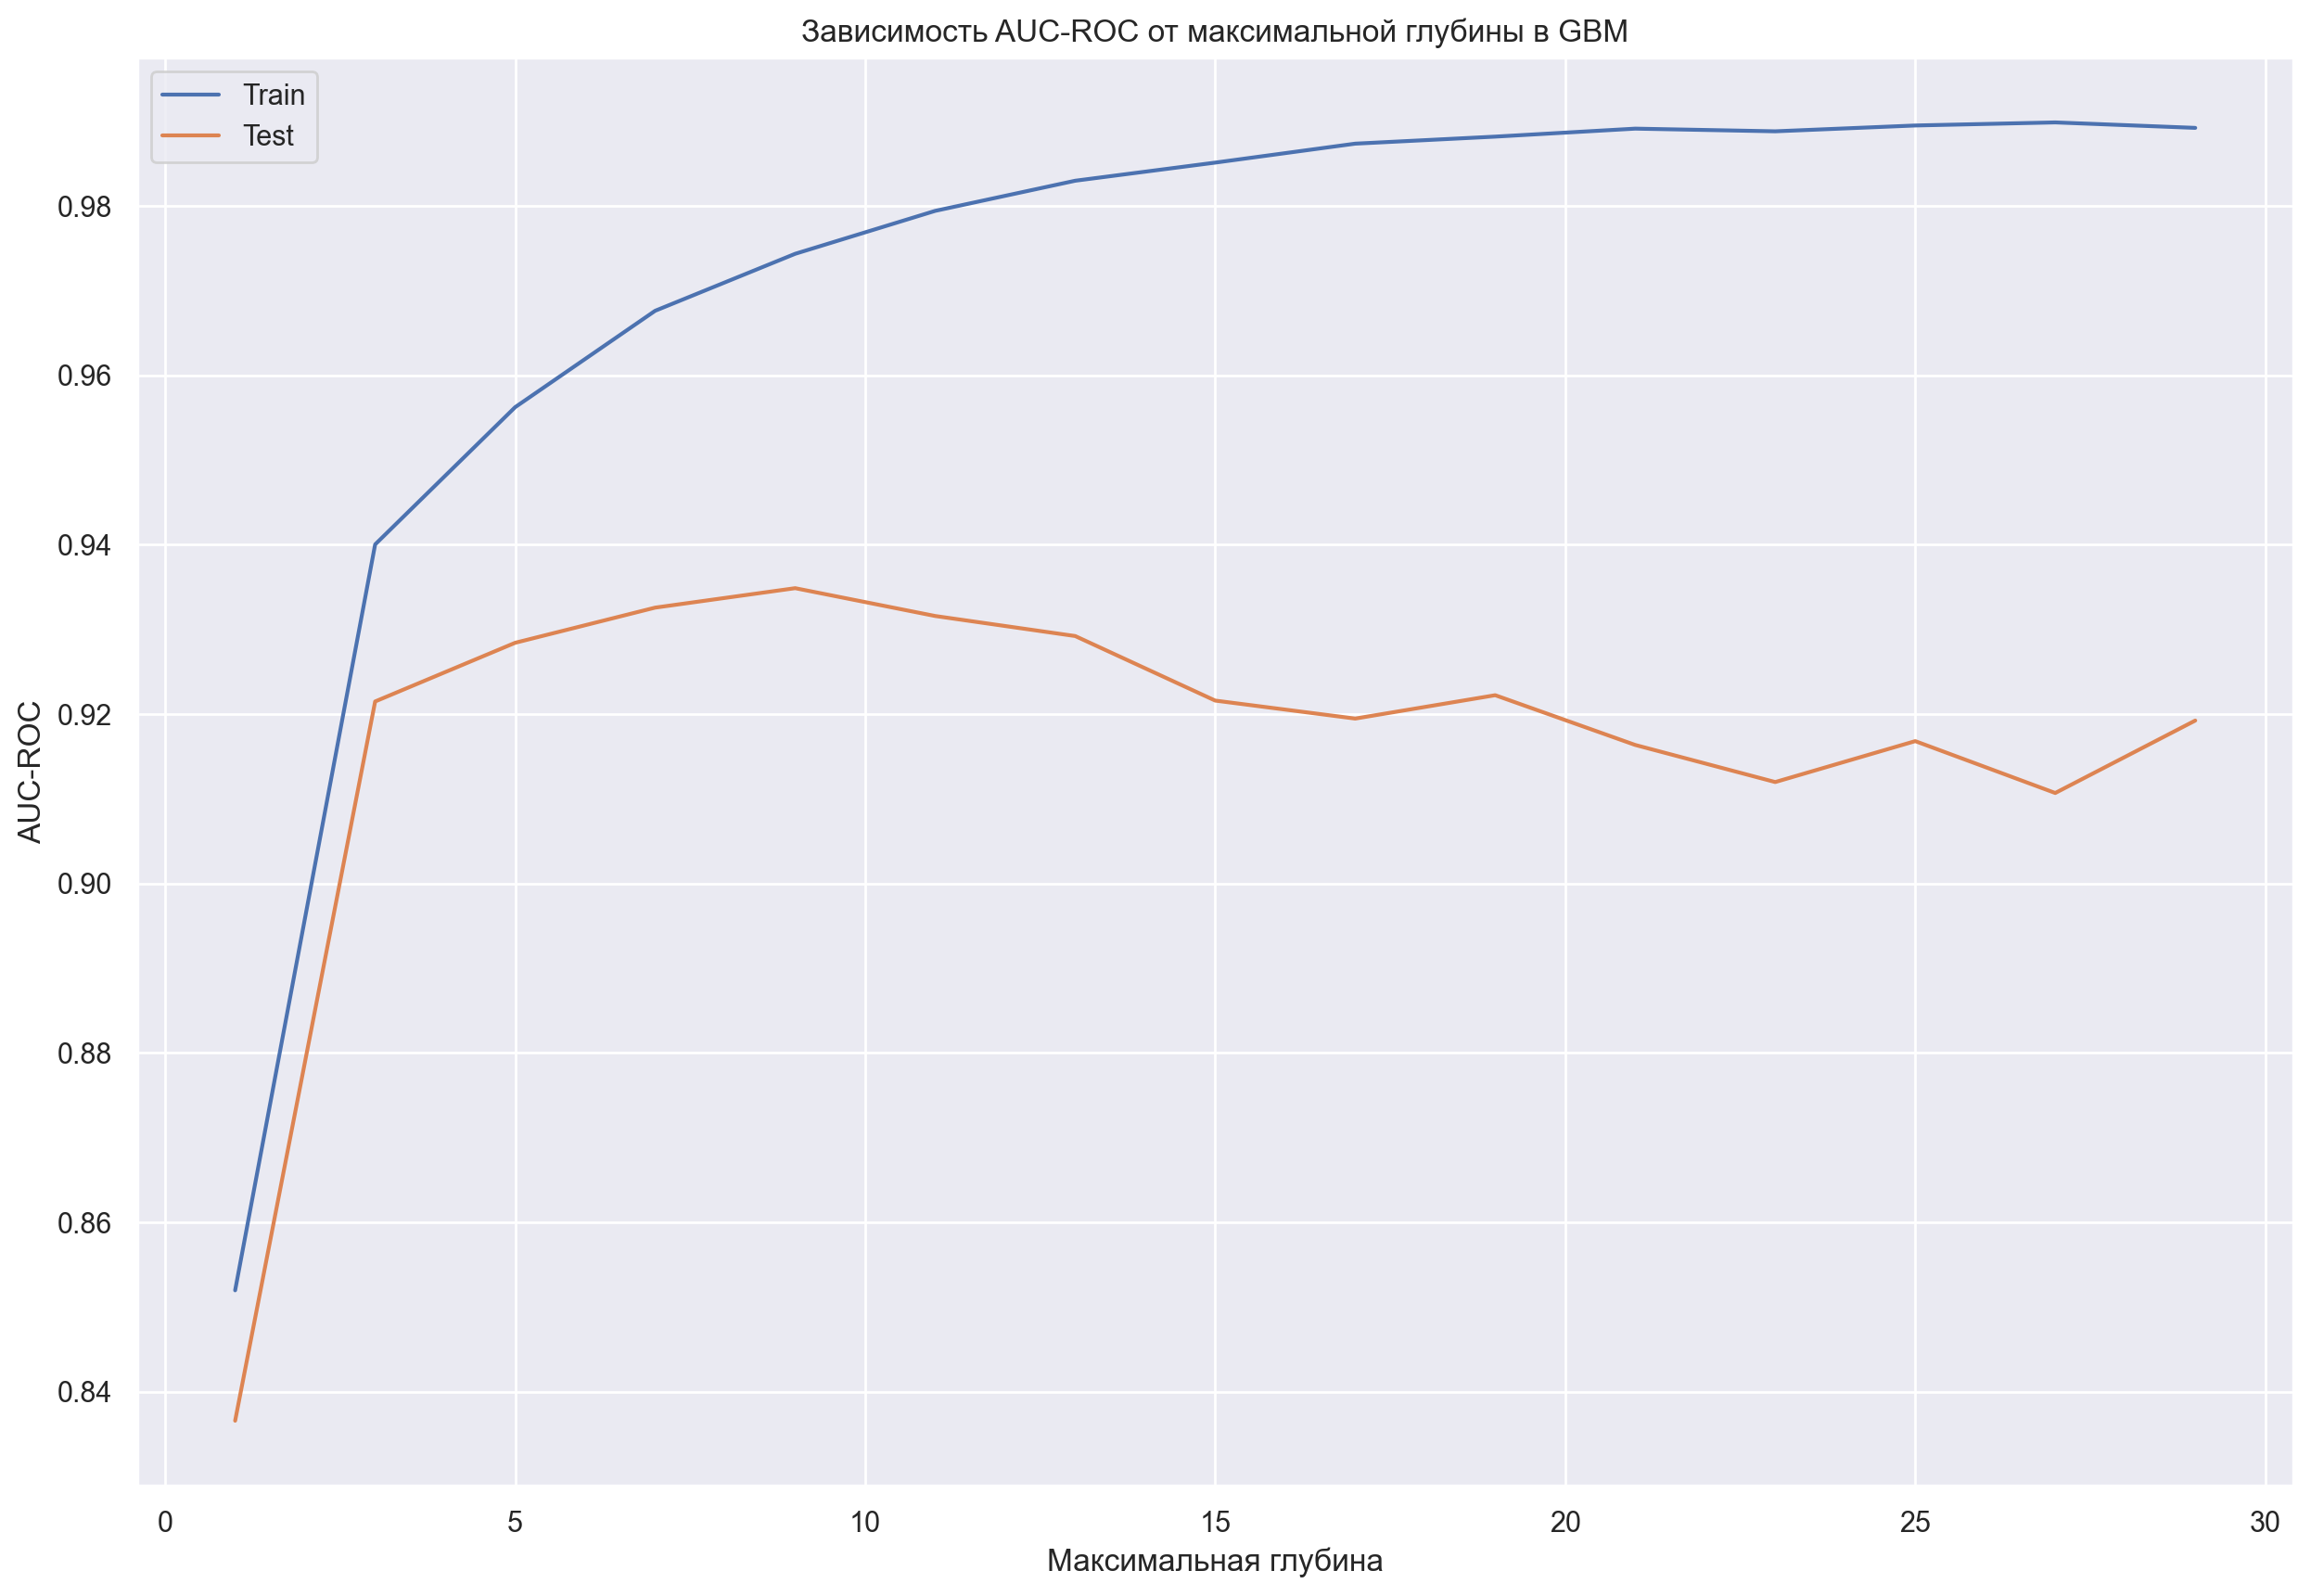

In [20]:
depths = list(depths)
plt.plot(depths, train_scores, label = "Train")
plt.plot(depths, test_scores, label = "Test")
plt.xlabel("Максимальная глубина")                                                                                  
plt.ylabel("AUC-ROC")
plt.legend()
plt.title("Зависимость AUC-ROC от максимальной глубины в GBM")

In [21]:
2*np.argmax(test_scores)

8

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество на тесте имеют модели с $\text{maxdepth} = 8$. Это можно объяснить тем, что при больших значениях $\text{maxdepth}$ у каждого отдельного дерева увеличивается разброс (хоть и уменьшается bias), поскольку оно лучше подстраивается под обучающую выборку. Тем самым уменьшается обобщающая способность модели и ошибка на тесте растет.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [22]:
import optuna

def objective(trial):
    model_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 50, step = 2),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50, step = 2),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 50, 100, step = 2),
        'n_estimators': trial.suggest_int('n_estimators', 2, 50, step = 2),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 10.0, log = True),
        'subsample': trial.suggest_float('subsample', 0, 1),
    }
    
    boosting = Boosting(
                        early_stopping_rounds = model_params['early_stopping_rounds'],
                        n_estimators = model_params['n_estimators'],
                        learning_rate = model_params['learning_rate'],
                        subsample = model_params['subsample'],
                        base_model_params={
                            "max_depth": model_params['max_depth'],
                            "min_samples_split": model_params['min_samples_split']
                            }
                        )
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    return boosting.score(x_valid, y_valid)
            
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100)
study.best_params

[I 2023-12-24 14:26:42,173] A new study created in memory with name: no-name-227ebe32-90f4-4e13-9ac7-3711807df50a
[I 2023-12-24 14:26:54,157] Trial 0 finished with value: 0.9397042542781039 and parameters: {'max_depth': 48, 'min_samples_split': 46, 'early_stopping_rounds': 50, 'n_estimators': 50, 'learning_rate': 0.0018185475548017993, 'subsample': 0.5505208703440688}. Best is trial 0 with value: 0.9397042542781039.
[I 2023-12-24 14:26:58,131] Trial 1 finished with value: 0.9224549481056137 and parameters: {'max_depth': 36, 'min_samples_split': 16, 'early_stopping_rounds': 54, 'n_estimators': 12, 'learning_rate': 1.397687112237062e-07, 'subsample': 0.9964170046434464}. Best is trial 0 with value: 0.9397042542781039.
[I 2023-12-24 14:27:04,260] Trial 2 finished with value: 0.9387583979668479 and parameters: {'max_depth': 36, 'min_samples_split': 32, 'early_stopping_rounds': 98, 'n_estimators': 48, 'learning_rate': 7.101238642876113e-08, 'subsample': 0.40978458743250157}. Best is trial 0

{'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

In [29]:
model_params = {'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

boosting = Boosting(
                    early_stopping_rounds = model_params['early_stopping_rounds'],
                    n_estimators = model_params['n_estimators'],
                    learning_rate = model_params['learning_rate'],
                    subsample = model_params['subsample'],
                    base_model_params={
                        "max_depth": model_params['max_depth'],
                        "min_samples_split": model_params['min_samples_split']
                        }
                    )
boosting.fit(x_train, y_train, x_valid, y_valid)
print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Train ROC-AUC 0.9800
Valid ROC-AUC 0.9403
Test ROC-AUC 0.9377


Видно, что подбор гиперпараметров помог улучшить ROC-AUC не только на валидационной выборке, но и на тесте.

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [24]:
#Код взят из ДЗ4
def plot_calibration_curve(y_test, preds, model_title):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) 
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios, label = 'Our calibration')
    plt.plot([0, 1], [0, 1], label='Perfect calibration', linestyle='--', color='green')
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Mean predicted probability (Positive class: 1)')
    plt.ylabel('Fraction positives (Positive class: 1)')
    plt.title(f'Калибровочная кривая для {model_title}')
    plt.legend()
    plt.grid()

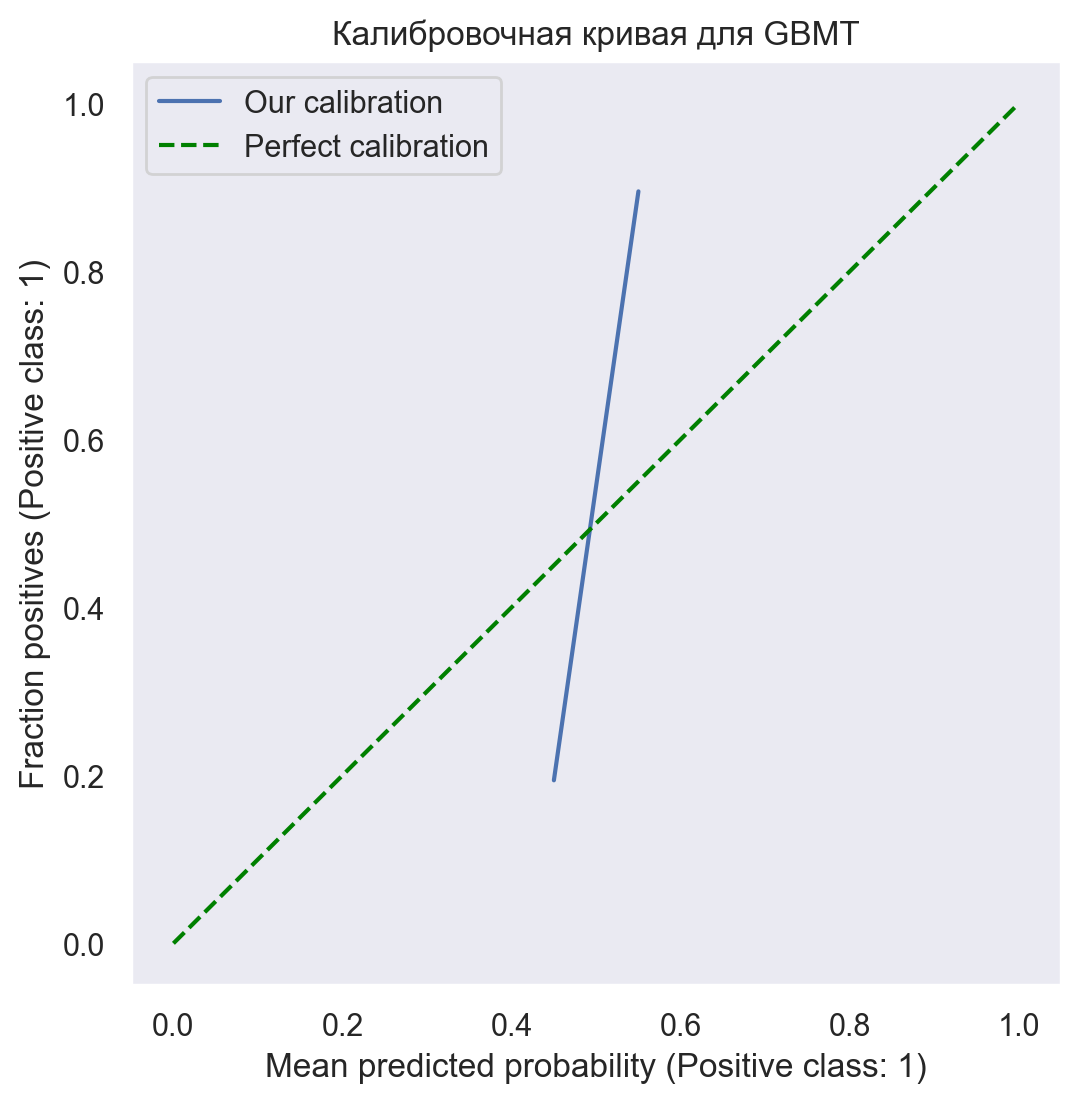

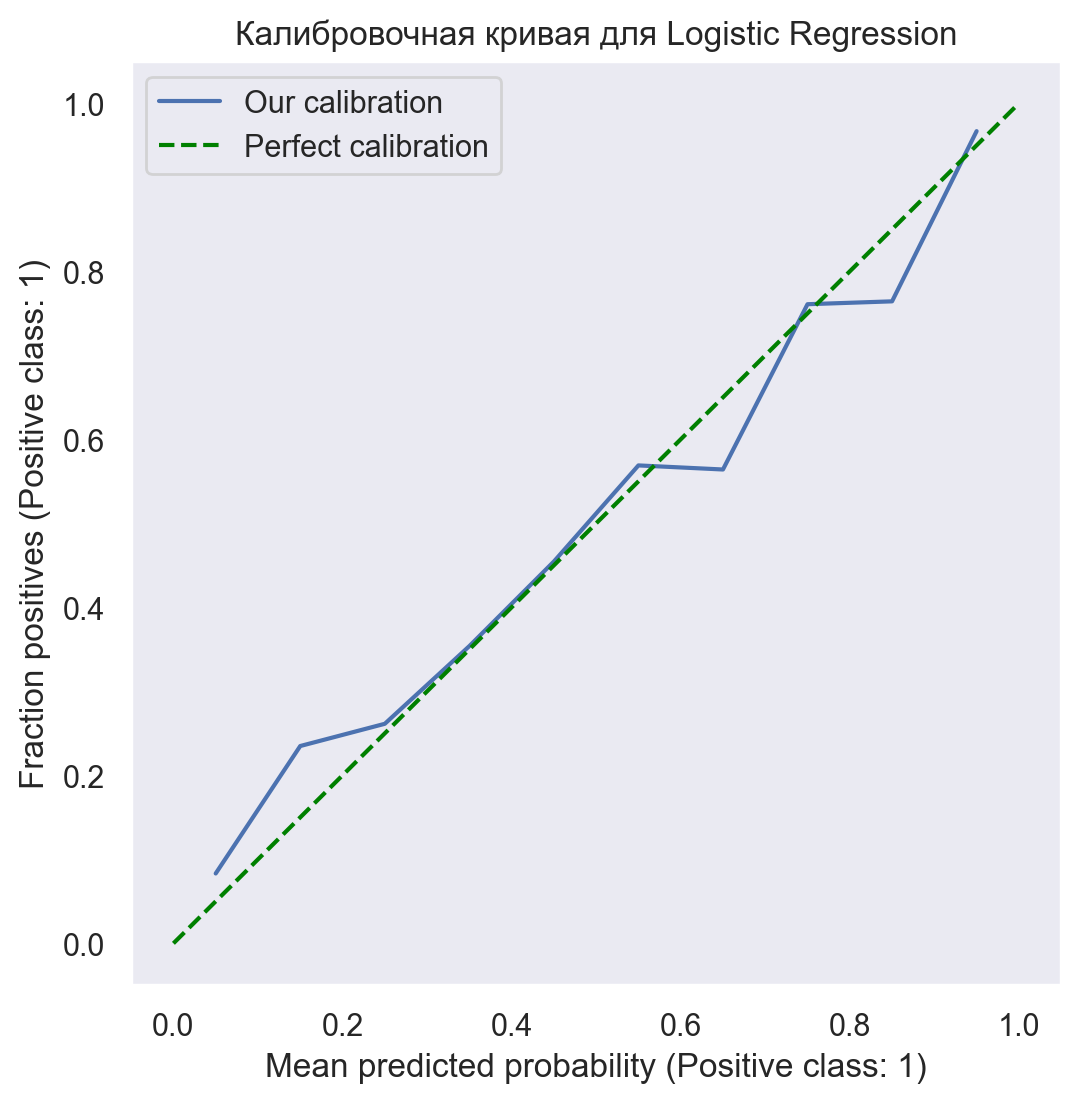

In [30]:
from sklearn.linear_model import LogisticRegression

model_params = {'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

boosting = Boosting(
                    early_stopping_rounds = model_params['early_stopping_rounds'],
                    n_estimators = model_params['n_estimators'],
                    learning_rate = model_params['learning_rate'],
                    subsample = model_params['subsample'],
                    base_model_params={
                        "max_depth": model_params['max_depth'],
                        "min_samples_split": model_params['min_samples_split']
                        }
                        )
boosting.fit(x_train, y_train, x_valid, y_valid)
boosting_preds = boosting.predict_proba(x_test)[:,1]
plot_calibration_curve(y_test, boosting_preds, model_title = 'GBMT')

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict_proba(x_test)[:,1]
plot_calibration_curve(y_test, lr_preds, model_title = 'Logistic Regression')

**Вывод**: видно, что LogReg лучше откалиброван, причем он более уверен в своих ответах по сравнению c GBM, чем объясняется его калибровочная кривая, близкая к 0.5.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [79]:
model_params = {'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

boosting = Boosting(
                    early_stopping_rounds = model_params['early_stopping_rounds'],
                    n_estimators = model_params['n_estimators'],
                    learning_rate = model_params['learning_rate'],
                    subsample = model_params['subsample'],
                    base_model_params={
                        "max_depth": model_params['max_depth'],
                        "min_samples_split": model_params['min_samples_split']
                        }
                        )
boosting.fit(x_train, y_train, x_valid, y_valid)
boosting_fi = boosting.feature_importances_

In [56]:
import pandas as pd 

pd.DataFrame.sparse.from_spmatrix(x_train).columns

RangeIndex(start=0, stop=169, step=1)

In [80]:
lr = LogisticRegression().fit(x_train, y_train)
weights = lr.coef_
feature_weights = []
for i in range(0,169):
    feature_weights.append(abs(weights[0][i]))
feature_weights = np.array(feature_weights)
feature_weights_lr = feature_weights / np.sum(feature_weights)

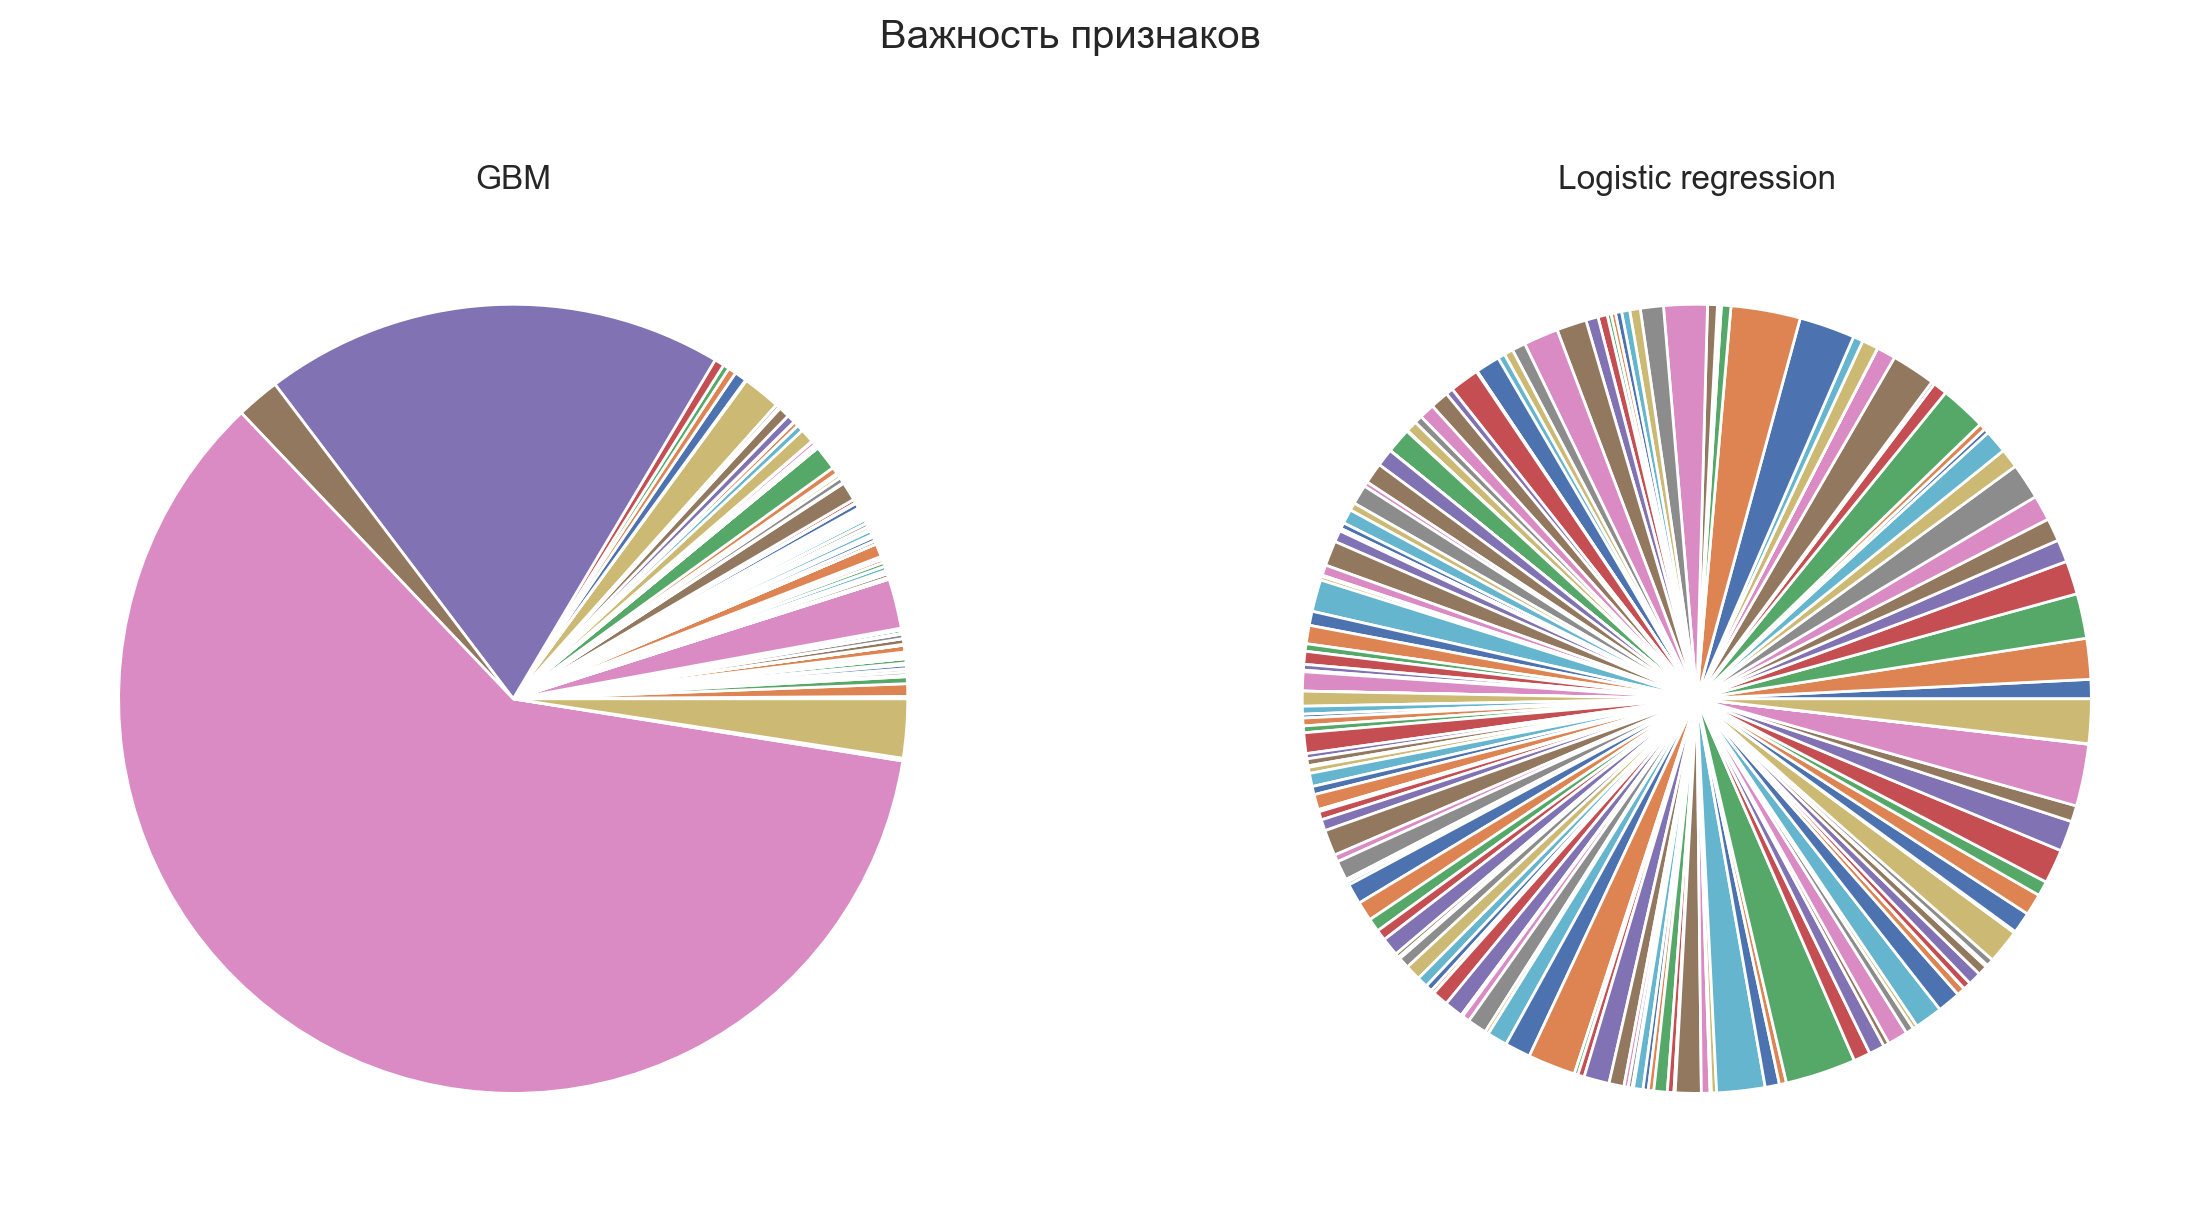

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(boosting_fi)
axs[1].pie(feature_weights_lr)

axs[0].set_title('GBM')
axs[1].set_title('Logistic regression')

plt.suptitle('Важность признаков')
plt.show()

**Вывод**: Видно, что у GBM есть какие-то значимые признаки, когда в LogReg какого-то сильно значимого признака выделить нельзя. Это можно объяснить тем, как делается сплит в GBM: когда признак попадает в сплит, он не учитывает все остальные признаки для дальнейшей классификации (или по крайней мере большую их часть), в LogReg все признаки учитываются одновременно и имеют ненулевые веса, что может задавливать самый значимый признак. 

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [113]:
import scipy.sparse

model_params = {'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

boosting = Boosting(
                    early_stopping_rounds = model_params['early_stopping_rounds'],
                    n_estimators = model_params['n_estimators'],
                    learning_rate = model_params['learning_rate'],
                    subsample = model_params['subsample'],
                    base_model_params={
                        "max_depth": model_params['max_depth'],
                        "min_samples_split": model_params['min_samples_split']
                        }
                        )

indices_desc = np.argsort(boosting_fi)[::-1]
features = indices_desc[:50]

x_train_fi = scipy.sparse.csr_matrix(pd.DataFrame.sparse.from_spmatrix(x_train)[features].values)
x_valid_fi = scipy.sparse.csr_matrix(pd.DataFrame.sparse.from_spmatrix(x_valid)[features].values)
x_test_fi = scipy.sparse.csr_matrix(pd.DataFrame.sparse.from_spmatrix(x_test)[features].values)
boosting.fit(x_train_fi, y_train, x_valid_fi, y_valid)
score = boosting.score(x_test_fi, y_test)

print(f'Train ROC-AUC {boosting.score(x_train_fi, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid_fi, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test_fi, y_test):.4f}')

Train ROC-AUC 0.9781
Valid ROC-AUC 0.9408
Test ROC-AUC 0.9373


**Вывод**: явного улучшения нет - ошибка на тесте выросла.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [115]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=0.5, random_state=1337)

In [116]:
model_params = {'max_depth': 20,
 'min_samples_split': 36,
 'early_stopping_rounds': 76,
 'n_estimators': 40,
 'learning_rate': 5.374091370042277e-08,
 'subsample': 0.3771160087621312}

boosting = Boosting(
                    early_stopping_rounds = model_params['early_stopping_rounds'],
                    n_estimators = model_params['n_estimators'],
                    learning_rate = model_params['learning_rate'],
                    subsample = model_params['subsample'],
                    base_model_params={
                        "max_depth": model_params['max_depth'],
                        "min_samples_split": model_params['min_samples_split']
                        }
                        )

boosting.fit(x_train1, y_train1, x_train2, y_train2)
x_train2_pred = boosting.predict_proba(x_train2)[:,1].reshape(-1,1)
x_test_pred = boosting.predict_proba(x_test)[:,1].reshape(-1,1)

In [129]:
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(x_train2_pred, y_train2)

y_test_pred = lr.predict_proba(x_test_pred)
y_test_pred = y_test_pred[:, 1]
roc_auc_blend = roc_auc_score(y_test, y_test_pred)
print(f'Test ROC-AUC = {roc_auc_blend:.4f}')

Test ROC-AUC = 0.9355


**Вывод**: качество чуть ухудшилось: Test ROC-AUC = 0.9355, когда был 0.9377.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [135]:
from catboost import CatBoostClassifier

def objective(trial):
    model_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 16, step = 1),
        'n_estimators': trial.suggest_int('n_estimators', 2, 50, step = 2),
        'learning_rate': trial.suggest_float('learning_rate', 0, 1),
    }
    
    cat_boosting = CatBoostClassifier(
                iterations = model_params['n_estimators'],
                learning_rate = model_params['learning_rate'],
                depth = model_params['max_depth'],
                verbose=False
            )
    cat_boosting.fit(x_train, y_train)
    return cat_boosting.score(x_valid, y_valid)
            
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 50)
study.best_params

[I 2023-12-24 16:32:59,343] A new study created in memory with name: no-name-8796cf94-c0f5-4db1-ba11-f0cf8d08df9f
[I 2023-12-24 16:32:59,505] Trial 0 finished with value: 0.8712829226847918 and parameters: {'max_depth': 6, 'n_estimators': 10, 'learning_rate': 0.2789839854638747}. Best is trial 0 with value: 0.8712829226847918.
[I 2023-12-24 16:33:16,229] Trial 1 finished with value: 0.8725573491928632 and parameters: {'max_depth': 14, 'n_estimators': 30, 'learning_rate': 0.7619339492170332}. Best is trial 1 with value: 0.8725573491928632.
[I 2023-12-24 16:33:16,875] Trial 2 finished with value: 0.881053525913339 and parameters: {'max_depth': 3, 'n_estimators': 50, 'learning_rate': 0.8237494573951866}. Best is trial 2 with value: 0.881053525913339.
[I 2023-12-24 16:33:22,196] Trial 3 finished with value: 0.8700084961767205 and parameters: {'max_depth': 12, 'n_estimators': 38, 'learning_rate': 0.88074261905592}. Best is trial 2 with value: 0.881053525913339.
[I 2023-12-24 16:33:22,686] T

{'max_depth': 6, 'n_estimators': 42, 'learning_rate': 0.24578244930411913}

In [137]:
best_params = {'max_depth': 6, 'n_estimators': 42, 'learning_rate': 0.24578244930411913}

cat_boosting = CatBoostClassifier(
                iterations = best_params['n_estimators'],
                learning_rate = best_params['learning_rate'],
                depth = best_params['max_depth'],
                verbose=False
            )
cat_boosting.fit(x_train, y_train)

print(f'Train ROC-AUC {cat_boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {cat_boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {cat_boosting.score(x_test, y_test):.4f}')

Train ROC-AUC 0.9188
Valid ROC-AUC 0.8828
Test ROC-AUC 0.8704


Наша реализация бустинга получилось лучше - ошибка на тесте меньше.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

Я здесь уставший после завода. Делал фотографию в эту пятницу, как выяснялось позже я заболел и слег с температурой 38 в тот день. Очень сильно хочу поскорей выздоровить к Новому году и надеюсь дозакрыть сессию в декабре (28-29 последние экзамены, очень не хочется переносить их на январь). Как обычно, чего-то специфичного не жду и в целом на целый год вперед не планирую, но жду начала января этого года, так как собираюсь с друзьями съездить в Питер (билеты и все остальное уже купили). 

С наступающим! И спасибо большое за очень оперативный грейдинг и ответы на все вопросы! :)


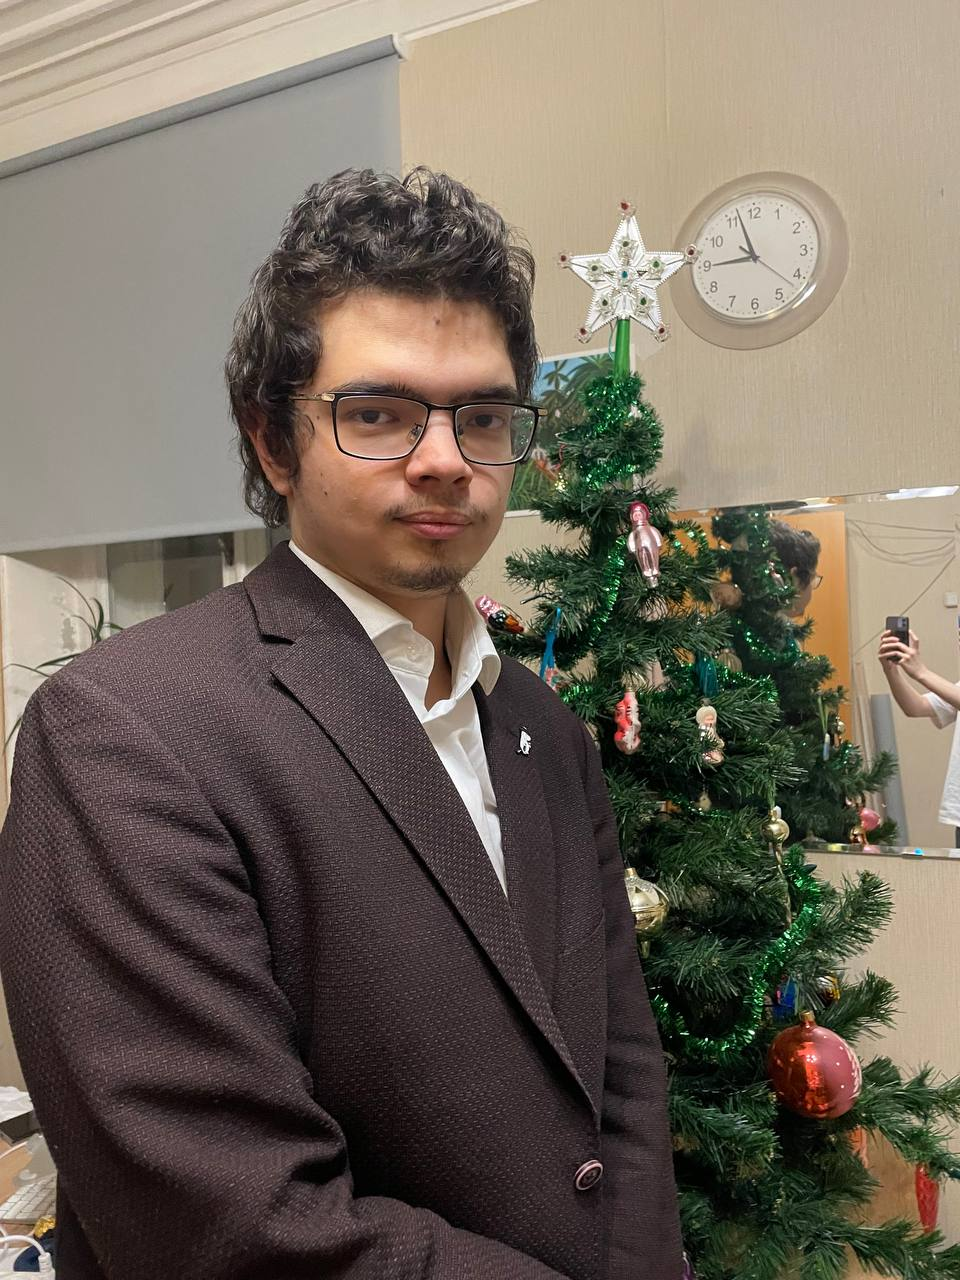